In [2]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

## Sampling & Distributions
### Probability
A population has 100 people, including Rick and Morty; we sample two people at random without replacement.
What's the probability that Rick and Morty are both in the sample (P(both Rick and Morty in sample)?

P(first Rick, then Morty) + P(first Morty, then Rick)

(1/100) * (1/99) + (1/100) * (1/99) = 0.0002

What's the probability that neither Rick nor Morty are in the sample (P(neither Rick nor Morty in sample)?

(98/100) * (97/99) = 0.9602


## Deterministic & Random Samples
#### `Deterministic sample`: 
when the sampling scheme doesn't involve chance.
#### `Random sample`: 
before drawing a sample, it's required that we know the selection probability of every group of people in the population; however, not all individuals/groups have to have an equal chance of being selected.

In [3]:
top1 = Table.read_table('top_movies_2017.csv')
top2 = top1.with_column('Row Index', np.arange(top1.num_rows))
top = top2.move_to_start('Row Index')

top.set_format(make_array(3, 4), NumberFormatter)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
1,Star Wars,Fox,"460,998,007","1,583,483,200",1977
2,The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
4,Titanic,Paramount,"658,672,302","1,204,368,000",1997
5,The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
6,Jaws,Universal,"260,000,000","1,138,620,700",1975
7,Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
8,The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
9,Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


In [6]:
top.take(make_array(3, 18, 100))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
18,The Lion King,Buena Vista,"422,783,777","792,511,700",1994
100,The Hunger Games,Lionsgate,"408,010,692","452,174,400",2012


In [7]:
top.where('Title', are.containing('Harry Potter'))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
74,Harry Potter and the Sorcerer's Stone,Warner Brothers,"317,575,550","497,066,400",2001
114,Harry Potter and the Deathly Hallows Part 2,Warner Brothers,"381,011,219","426,630,300",2011
131,Harry Potter and the Goblet of Fire,Warner Brothers,"290,013,036","401,608,200",2005
133,Harry Potter and the Chamber of Secrets,Warner Brothers,"261,988,482","399,302,200",2002
154,Harry Potter and the Order of the Phoenix,Warner Brothers,"292,004,738","377,314,200",2007
175,Harry Potter and the Half-Blood Prince,Warner Brothers,"301,959,197","359,788,300",2009
177,Harry Potter and the Prisoner of Azkaban,Warner Brothers,"249,541,069","357,233,500",2004


While these are samples, they are not random samples. They don’t involve chance.

In [4]:
"""Choose a random start among rows 0 through 9;
then take every 10th row."""

start = np.random.choice(np.arange(10))
systematic_sample = top.take(np.arange(start, top.num_rows, 10))
systematic_sample.show()

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
4,Titanic,Paramount,"658,672,302","1,204,368,000",1997
14,Avatar,Fox,"760,507,625","865,082,100",2009
24,The Godfather,Paramount,"134,966,411","701,621,600",1972
34,Shrek 2,Dreamworks,"441,226,247","631,642,700",2004
44,Airport,Universal,"100,489,151","587,729,300",1970
54,Finding Nemo,Buena Vista,"380,843,261","547,504,100",2003
64,Back to the Future,Universal,"210,609,762","524,960,300",1985
74,Harry Potter and the Sorcerer's Stone,Warner Brothers,"317,575,550","497,066,400",2001
84,Men in Black,Sony,"250,690,539","485,542,200",1997
94,Mrs. Doubtfire,Fox,"219,195,243","468,364,200",1993


## Distributions

### Probability Distribution
* Random quantity with various possible values
* "Probability distribution:"

  * All the possible values of the quantity
  * The probability of each of those values

* If you can do the math, you can work out the probability distribution without ever simulating it... but simulation is often easier

### Empericial Distribution
* The word `empirical` is used in many different contexts, and means "based on observations"
* Empirical observations can be from repetitions of an experiment
* `"Empirical Distribution"`
   * All observed values

   * The proportion of times each value appears

Note that, if the sample size is large, the `empirical distribution` of a `uniform random` sample resembles the distribution of the population with high probability


In [5]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


As we increase the number of rolls in the simulation, the area of each bar gets closer to 16.67%, which is the area of each bar in the probability histogram.

The histogram below helps us visualize the fact that every face appears with probability 1/6. We say that the histogram shows the distribution of probabilities over all the possible faces. 

Since all the bars represent the same percent chance, the distribution is called uniform on the integers 1 through 6.


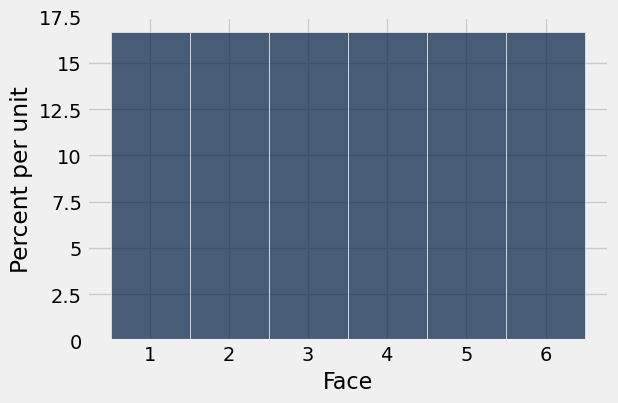

In [13]:
die_bins = np.arange(0.5, 6.6, 1)
die.hist(bins = die_bins)

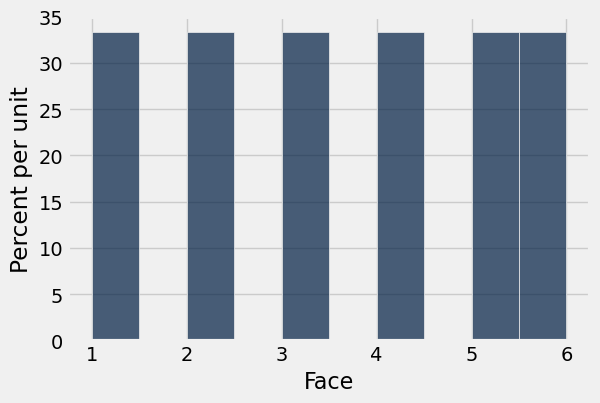

In [6]:
die.hist()

`Empirical distributions` are distributions of observed data.
They can be visualized by empirical histograms.
The Table method is called sample. It draws at random with replacement from the rows of a table.

Its argument is the sample size, and it returns a table consisting of the rows that were selected. An optional argument with_replacement=False specifies that the sample should be drawn without replacement.

Because we are going to do this repeatedly, we define a function empirical_hist_die that takes the sample size as its argument, rolls a die as many times as the argument, and then draws a histogram of the observed results.

Empirical distributions, on the other hand, are distributions of observed data. 
They can be visualized by empirical histograms.

In [7]:
def empirical_hist_die(n):
    die.sample(n).hist(bins = die_bins)
empirical_hist_die(10)

NameError: name 'die_bins' is not defined

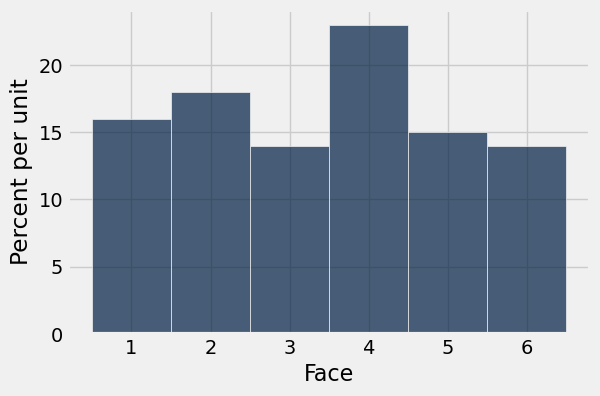

In [15]:
empirical_hist_die(100)

In [ ]:
die.sample(100000).hist(bins=die_bins)

## Large Random Samples
### Law of Averages / Law of Large Numbers
* "If a chance experiment is repeated many times, independently and under the same conditions, then the proportion of times that an event occurs gets closer to the theoretical probability of the event"

  * `Example`: "As you increase the number of rolls of a die, the proportion of times you see the face with five spots gets closer to 1/6"


  * `The simplest example in existence`: flip a coin an infinite number of times and you'll have gotten heads 50% of the time and tails 50% of the time.



In [ ]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

In [ ]:
united.column('Delay').min()

In [ ]:
united.column('Delay').max()

In [ ]:
delay_bins = np.append(np.arange(-20, 301, 10), 600)
united.hist('Delay', bins = delay_bins, unit = 'minute')

In [ ]:
united.where('Delay', are.above(200)).num_rows/united.num_rows

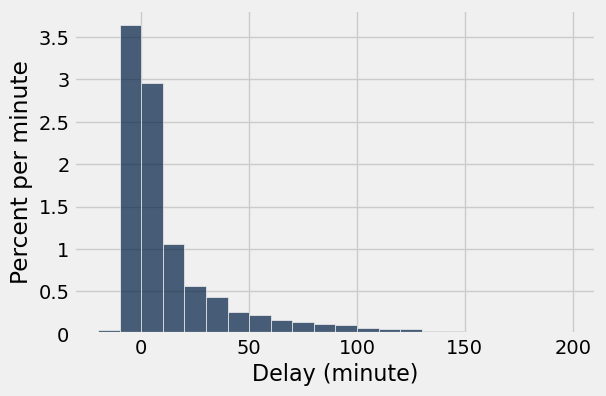

In [8]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')

The height of the [0, 10) bar is just under 3% per minute, which means that just under 30% of the flights had delays between 0 and 10 minutes. That is confirmed by counting rows:

In [26]:
united.where('Delay', are.between(0, 10)).num_rows/united.num_rows

0.2935985533453888

## Empirical Distribution of the Sample
Let us now think of the 13,825 flights as a population, and draw random samples from it with replacement. 

It is helpful to package our code into a function.

The function empirical_hist_delay takes the sample size as its argument and draws an empiricial histogram of the results.

In [20]:
def empirical_hist_delay(n):
    united.sample(n).hist('Delay', bins = delay_bins, unit = 'minute')

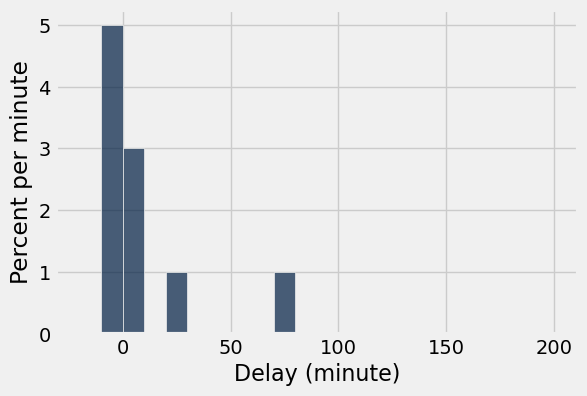

In [28]:
empirical_hist_delay(10)

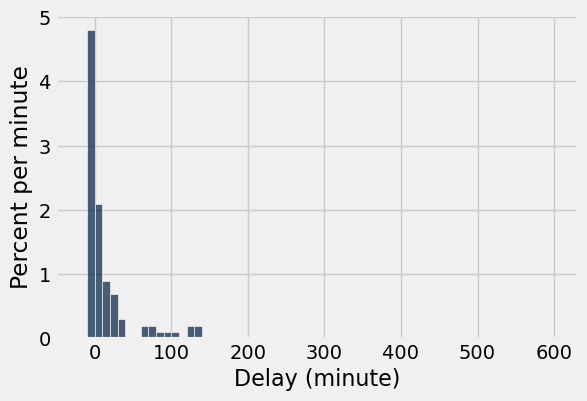

In [21]:
empirical_hist_delay(100)

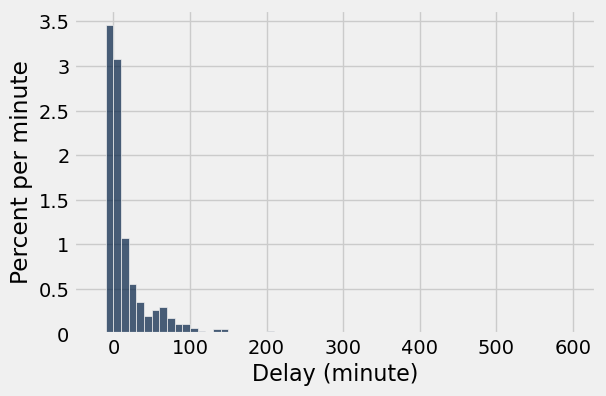

In [15]:
empirical_hist_delay(1000)

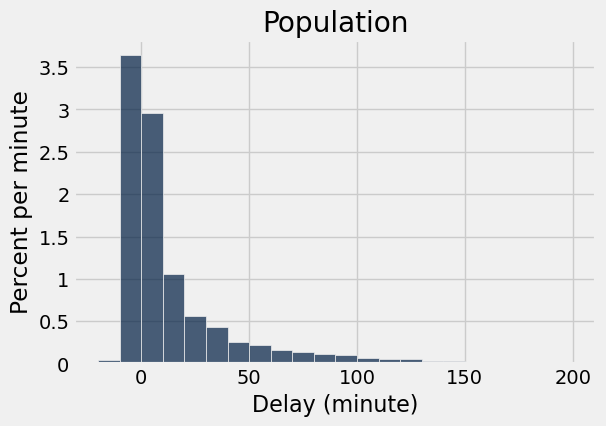

In [22]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')
plt.title('Population');

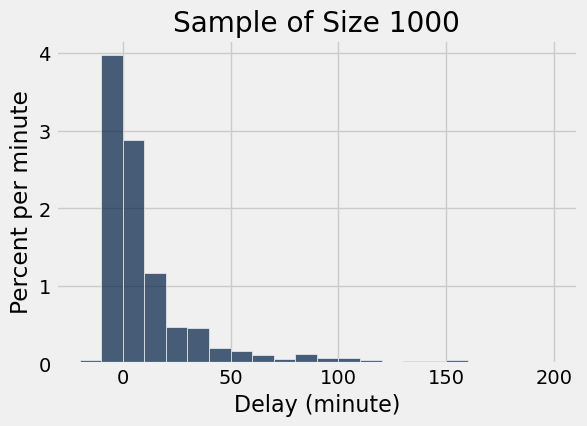

In [23]:
sample_1000 = united.sample(1000)
sample_1000.hist('Delay', bins = delay_bins, unit = 'minute')
plt.title('Sample of Size 1000');

## Statistical Inference
`Statistical inferences` are conclusions which are made based on data in random samples

* Example: use the data to guess the number of an unknown (fixed) number
* Create an estimate, which depends on the random sample, of the unknown quantity

1)  `Parameter`: a number associated with the population
2) `Statistic`: a number calculated from the sample

    A statistic can be used as an estimate of a parameter == a number calculated from the sample can be used as an estimate of a number associated with the population


## Probability vs. Empirical Distributions
#### `Probability distributions` are...
* varying, since random samples vary
* including all posisble values of the statistic and all the corresponding probabilities
* sometimes hard to calculate! You'll either have to do the math or generate all possible samples and calculate the statistic based on each sample

#### `Empirical distributions` are...
* based on simulated values of the statistic
* consist of all the observed values of the statistic and the proportion of times each value appeared
* is a good approximation to the probability distribution of the statistic (iff the number of repetitions in the simulation is fairly large)


In [24]:
# (Population) Parameter
np.median(united.column('Delay'))

2.0

In [18]:
united.where('Delay', are.below_or_equal_to(2)).num_rows / united.num_rows

0.5018444846292948

In [19]:
united.where('Delay', are.equal_to(2)).num_rows

480

In [ ]:
# (Sample) Statistic
np.median(united.sample(10).column('Delay'))

In [21]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [22]:
sample_median(10)

4.0

In [23]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

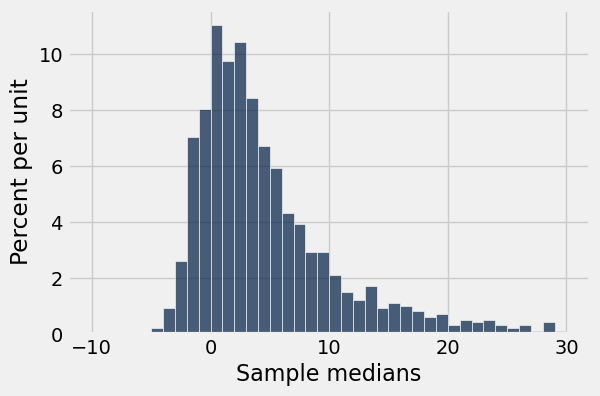

In [24]:
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

## Models
### Assessing Models
* A model is a set of assumptions about the data
*  In data science, many models involve assumptions about processes that involve randomness, such as chance models

### Approach to Assessment
* If we are able to simulate data according to the assumptions of the model, we can learn what the model predicts
* Then, we can compare the predictions to the data that were observed
* If both the data and the model's predictions are not consistent, that is evidence against the model!

### Steps to Assessment
1) Choose a statistic to measure discrepancy between model and data
2) Simulate the statistics under the model's assumptions
3) Compare the data to the model's predictions
    
   * Draw a histogram of simulated values of the statistic
   
   * Compute the observed statistic from the real sample
   
4) If the observed statistic is far from the histogram, that is evidence against the model

## `sample_proportions`
`sample_proportions` can be used to randomly sample from multiple categories when you know the proportion of data points that are expected to fall in each category. `sample_proportions` takes two arguments: the sample size and an array that contains the distribution of categories in the population (should sum to 1).

sample_proportions returns an array that is the same length as the proportion array that is passed through. 

It contains the proportion of each category that appears in the sample.


## Hypotheses
* A test chooses between two views of how data were generated
* The views are called hypotheses
* The test helps us choose between the two views, based on consistency with the data

### Gregor Mendel's Model:

1) Mendel took pea plants of a particular kind, each with either purple flowers or white flowers
2) He claimed that

    * Each plant is purple-flowering with a chance of 75% and
    * this was regardless of the colors of the other plants

### The Null Hypothesis is that Mendel had...
1) A well defined chance model ahout how the data were generated
2) A model under which we can simulate data under its assumptions, "under the null hypothesis"
3) A good model: the plants are like draws at random with replacement from the distribution [0.75, 0.25]


### The Alternative hypothesis: is that Mendel had...
A poorly defined model (this hypothesis is a different view about the origin of the data)



For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in all the other plants.

To see whether his model was valid, Mendel grew 929 pea plants of this variety. Among these 929 plants, 705 had purple flowers.

In [26]:
## Gregor Mendel had 929 plants, of which 709 had purple flowers
## Pea plants of a particular kind
## Each one has either purple flowers or white flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [27]:
expected_prop = 0.75

In [28]:
mendel_proportions = make_array(.75, .25)

flowers = sample_proportions(929, mendel_proportions)
flowers

array([ 0.76749193,  0.23250807])

In [29]:
simulated_proportion_purple = flowers.item(0)
simulated_proportion_white = flowers.item(1)

print("In our simulation, " + str(simulated_proportion_purple) + " of flowers were purple and " \
      + str(simulated_proportion_white) + " of flowers were white.")

In our simulation, 0.767491926803014 of flowers were purple and 0.232508073196986 of flowers were white.


In [50]:
perecnt_purple = sample_proportions(929, mendel_proportions).item(0) * 100
perecnt_purple

74.05812701829925

In [51]:
def statistic_distance():
    return abs(perecnt_purple - 75)

In [52]:
perecnt_purple = statistic_distance()
perecnt_purple 

0.9418729817007545

In [64]:
# This saves the random state of our code so that we can 
# generate the same numbers each time we run the code.
# Generates pseudo-random number based on seed. Seed can be any number.
np.random.seed(16)

mendel_proportions = make_array(.75, .25) 
simulated_proportion  = sample_proportions(929, mendel_proportions).item(0) 
one_distance =  abs(100 * simulated_proportion  - 75)
one_distance

0.565123789020447

In [65]:
def one_simulated_distance(mendel_proportions, expected_proportion):
    '''Simulates 929
    Returns one statistic from the simulation.'''

    simulated_proportion = sample_proportions(292, mendel_proportions).item(0)
    one_distance =  abs(100 * simulated_proportion  - 75)
    return one_distance


In [66]:
# Simulating Multiple Values of the Statistic
# The focus of our analysis is the variability in the counts.
# Let’s generate 10,000 simulated values.
num_repetitions = 10000

distances  = make_array() 

for i in np.arange(num_repetitions):
    one_distance = one_simulated_distance(mendel_proportions, expected_prop)
    distances = np.append(distances, one_distance)
distances

array([ 3.08219178,  2.05479452,  3.42465753, ...,  1.02739726,
        0.34246575,  2.05479452])

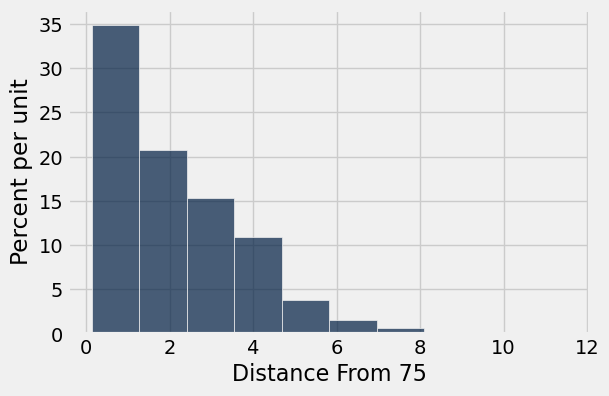

In [114]:
Table().with_column("Distance From 75",distances).hist()

In [72]:
observed_statistic = abs ( 100 * (705 / 929) - 75)
observed_statistic

0.8880516684607045

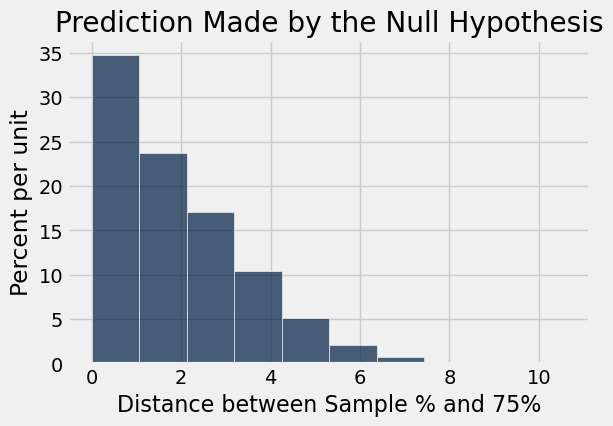

In [74]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()

plt.title('Prediction Made by the Null Hypothesis');

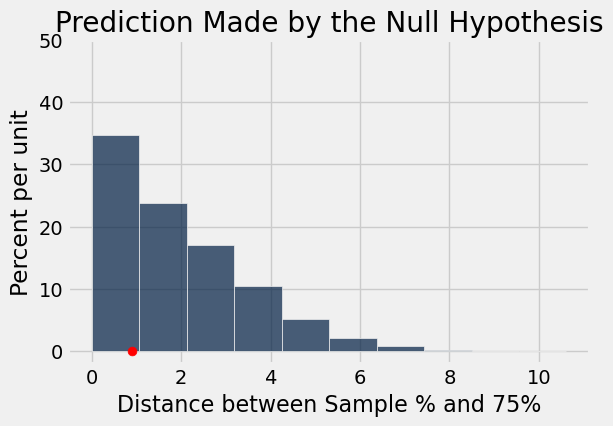

In [75]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plt.ylim(-0.02, 0.5)
plt.title('Prediction Made by the Null Hypothesis')
plt.scatter(observed_statistic, 0, color='red', s=40);